In [60]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=dd17eba7ce20dd48b9f2e95e6cf5dd0c1c696eef6f851bc6d3857c1883ca74ae
  Stored in directory: c:\users\krishna\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [110]:
fraud= pd.read_csv('C:/Users/krishna/Downloads/Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [111]:
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","Taxable.Income":"income",
                      "City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
fraud.head()

,undergrad,marital,income,population,experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [150]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variables
df=pd.get_dummies(fraud,columns=['undergrad','marital','urban'], drop_first=True)

In [151]:
df.head()

,income,population,experience,undergrad_YES,marital_Married,marital_Single,urban_YES
0,68833.0,50047.0,10.0,0,0,1,1
1,33700.0,134075.0,18.0,1,0,0,1
2,36925.0,160205.0,30.0,0,1,0,1
3,50190.0,193264.0,15.0,1,0,1,1
4,81002.0,27533.0,28.0,0,1,0,0


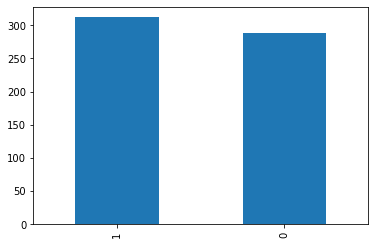

In [152]:
ax = df.undergrad_YES.value_counts().plot(kind='bar')

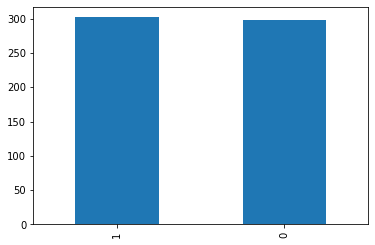

In [153]:
#gender
ax = df.urban_YES.value_counts().plot(kind='bar')

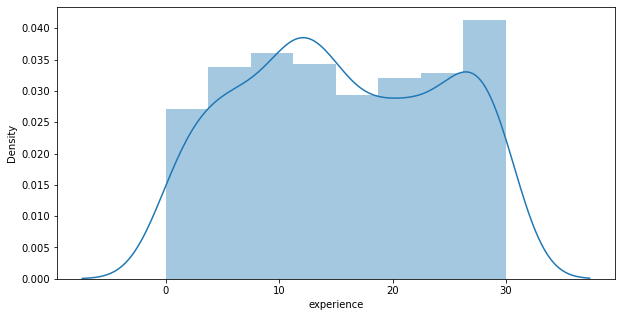

In [154]:
import seaborn as sns
df['experience'] = df['experience'].astype(float)
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df['experience'])
plt.show()

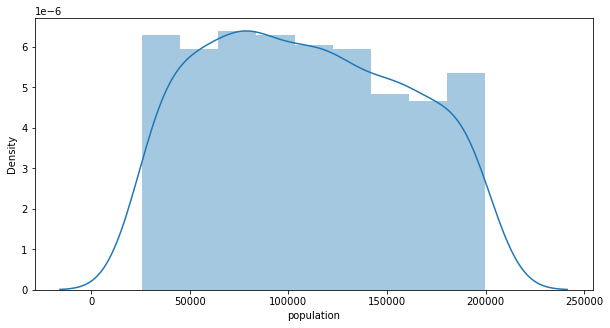

In [155]:
import seaborn as sns
df['population'] = df['population'].astype(float)
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df['population'])
plt.show()

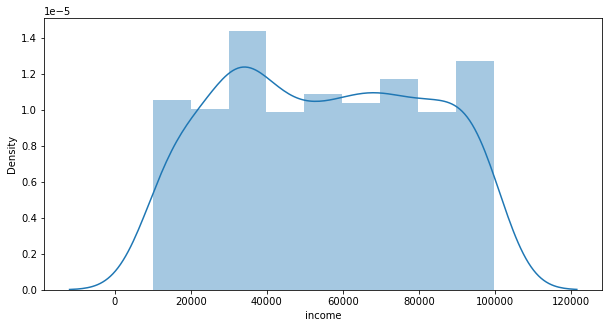

In [156]:
import seaborn as sns
df['income'] = df['income'].astype(float)
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df['income'])
plt.show()

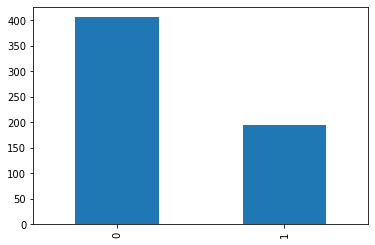

In [149]:
ax = df.marital_Married.value_counts().plot(kind='bar')

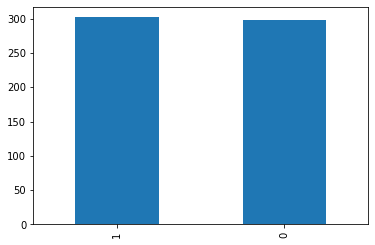

In [146]:
ax = df.urban_YES.value_counts().plot(kind='bar')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x576 with 0 Axes>

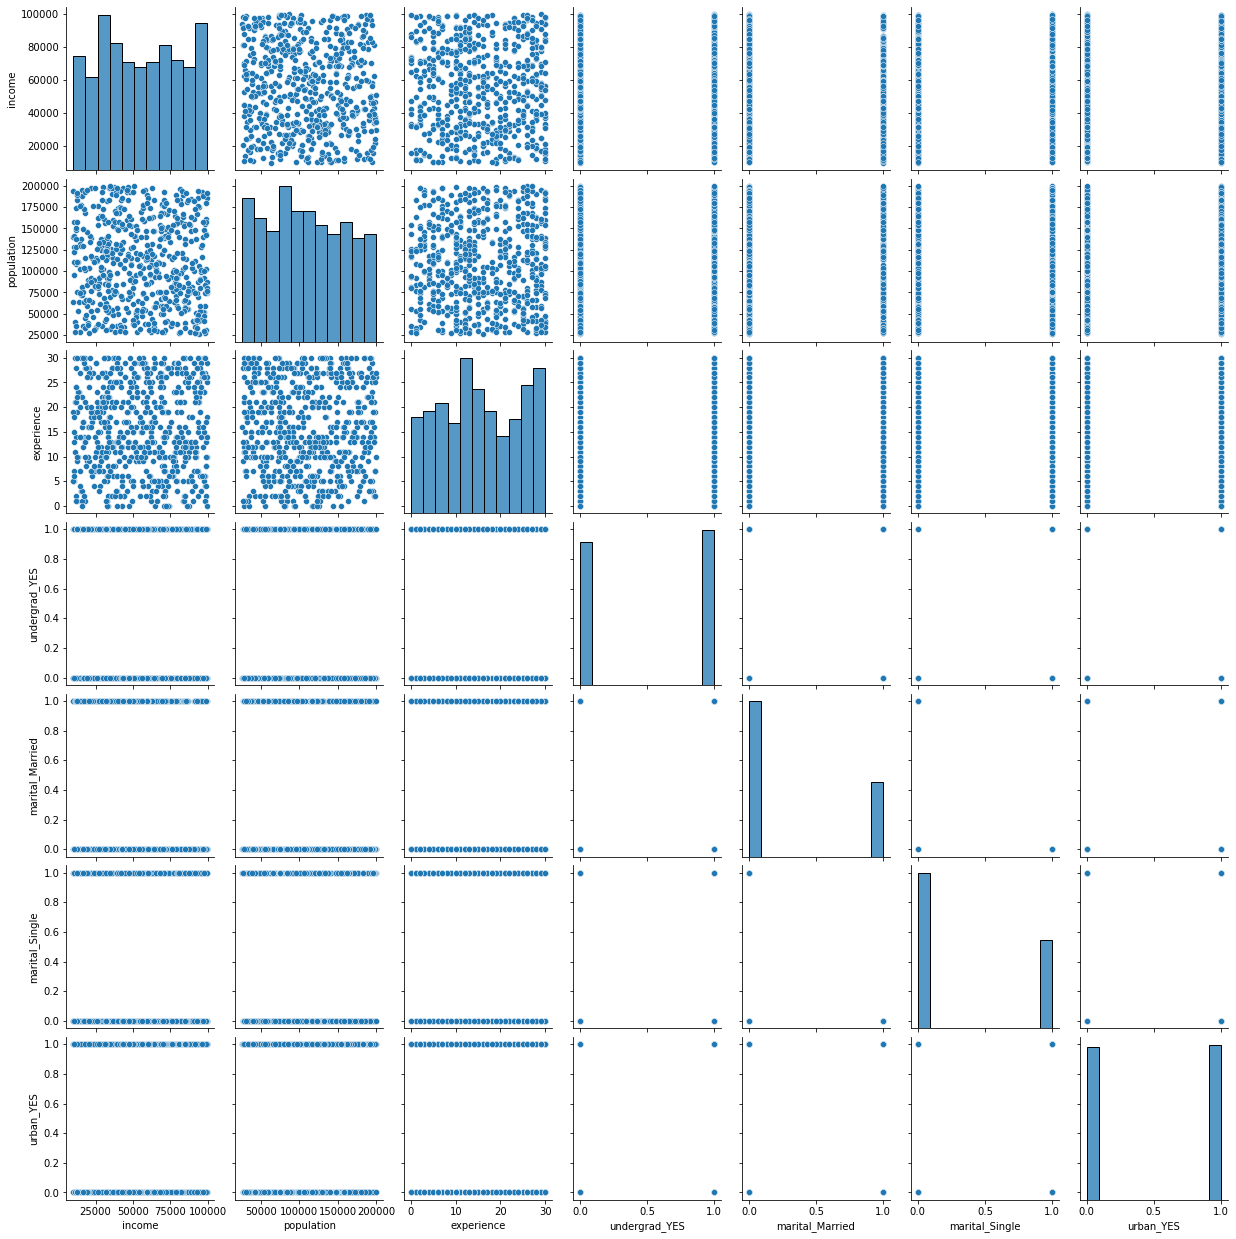

In [142]:
plt.figure(figsize=(12,8))
sns.pairplot(df)
plt.show

<AxesSubplot:>

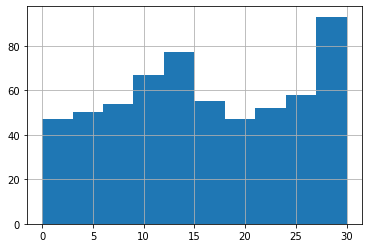

In [157]:
df.experience.hist()

<AxesSubplot:>

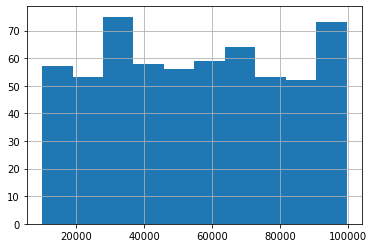

In [158]:
df.income.hist()

<AxesSubplot:xlabel='urban_YES', ylabel='count'>

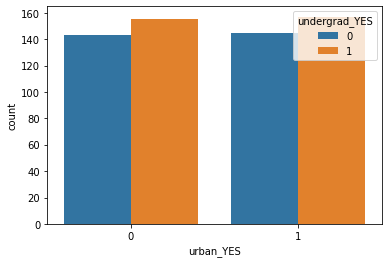

In [160]:
sns.countplot(df['urban_YES'],hue=df['undergrad_YES'])

In [165]:
df.corr()

,income,population,experience,undergrad_YES,marital_Married,marital_Single,urban_YES
income,1.000000,-0.064387,-0.001818,-0.049232,-0.100611,0.037910,0.070628
population,-0.064387,1.000000,0.013135,0.079579,-0.007035,0.002087,-0.040098
experience,-0.001818,0.013135,1.000000,-0.005362,0.033347,-0.018123,-0.094559
undergrad_YES,-0.049232,0.079579,-0.005362,1.000000,0.015120,0.028883,-0.000267
marital_Married,-0.100611,-0.007035,0.033347,0.015120,1.000000,-0.520317,0.016771
marital_Single,0.037910,0.002087,-0.018123,0.028883,-0.520317,1.000000,0.047014
urban_YES,0.070628,-0.040098,-0.094559,-0.000267,0.016771,0.047014,1.000000


In [166]:
#we will take all the features and try to see how our algorithm performs

In [167]:
# Converting the Sales column into categorical value using mean of the column 7.49
taxable_val = []
for value in df["income"]:
    if value<=30000:
        taxable_val.append("risky")
    else:
        taxable_val.append("good")
df["taxable_val"]= taxable_val

In [130]:
df.head()

,income,population,experience,undergrad_YES,marital_Married,marital_Single,urban_YES,taxable_val
0,68833.0,50047.0,10.0,0,0,1,1,good
1,33700.0,134075.0,18.0,1,0,0,1,good
2,36925.0,160205.0,30.0,0,1,0,1,good
3,50190.0,193264.0,15.0,1,0,1,1,good
4,81002.0,27533.0,28.0,0,1,0,0,good


In [131]:
X = df.drop(['income','taxable_val'], axis =1)
Y = df['taxable_val'] #Y is our target variable

In [132]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y)

# Random forest

In [133]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 4

In [134]:
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=4)

In [135]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_predict)

0.75

In [136]:
confusion_matrix(y_test,y_predict)

array([[88,  7],
       [23,  2]], dtype=int64)

In [137]:
pred = model.predict(x_test)
print('Test data Accuracy is:',np.mean(pred==y_test))
pred1 = model.predict(x_train)
print('Train data Accuracy is:',np.mean(pred1==y_train))

Test data Accuracy is: 0.75
Train data Accuracy is: 1.0


# lets us use various ensemble techniques to check the accuracy

# Bagging

In [138]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7

cart = DecisionTreeClassifier()
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results1 = cross_val_score(model1, X, Y, cv=kfold)
(results1.mean())

0.7333333333333333

# Boosting

In [139]:
from sklearn.ensemble import AdaBoostClassifier

model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results2 = cross_val_score(model2, X, Y, cv=kfold)
(results2.mean())

0.7766666666666666

# Stacking

In [140]:
from sklearn.linear_model import LogisticRegression #this are the 3 models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier #stores all 3 models

# create the sub models
estimators = [] #list comprises of all the 3 models
model4 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model4))
model5 = DecisionTreeClassifier()
estimators.append(('cart', model5))
model6 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model6))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
(results.mean())

0.7866666666666665